## 1st - We clean the Data of the Test to be ready

In [1404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as pca

In [1405]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [1406]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [1407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics  
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

In [1408]:
# for inline plots in jupyter
%matplotlib inline 

In [1409]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

In [1410]:
df = pd.read_csv("Marketing_Campaign_Test.csv")

In [1411]:
print("Shape: ", df.shape)
df.head()

Shape:  (560, 28)


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue
0,5430,1956.0,Graduation,Together,54450.0,1.0,1.0,14/09/2012,0,454.0,...,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
1,8996,1957.0,PhD,Married,NaN,2.0,1.0,19/11/2012,4,230.0,...,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
2,8432,1956.0,Graduation,Together,NaN,1.0,1.0,14/09/2012,0,454.0,...,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
3,6566,1954.0,PhD,NaN,72550.0,1.0,1.0,08/11/2012,39,826.0,...,12.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
4,2552,1955.0,PhD,Single,55521.0,1.0,2.0,22/10/2013,11,416.0,...,6.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0


In [1412]:
df['Age'] = 2022 - df['Year_Birth'] # add column for convient of the Age
df['Age']

0      66.0
1      65.0
2      66.0
3      68.0
4      67.0
       ... 
555    40.0
556    66.0
557    43.0
558    44.0
559    46.0
Name: Age, Length: 560, dtype: float64

In [1413]:
df.replace('unknown',np.nan,inplace = True) # maybe to remove -unneccery

In [1414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     560 non-null    int64  
 1   Year_Birth             551 non-null    float64
 2   Education              556 non-null    object 
 3   Status                 543 non-null    object 
 4   Income                 543 non-null    float64
 5   Num_of_kids            556 non-null    float64
 6   Num_of_Teen            550 non-null    float64
 7   Registration_date      560 non-null    object 
 8   Recency                560 non-null    int64  
 9   Mnt_Fruits             558 non-null    float64
 10  Mnt_Meat               558 non-null    float64
 11  Mnt_sweet              552 non-null    float64
 12  Mnt_Wines              558 non-null    float64
 13  Mnt_Gold_Products      558 non-null    float64
 14  Mnt_Fish               558 non-null    float64
 15  Num_We

In [1415]:
df[df.isnull().sum(axis=1)>7]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age
552,7617,1974.0,Graduation,Single,42373.0,1.0,1.0,15/08/2013,83,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0
559,4692,1976.0,Graduation,Married,7500.0,1.0,0.0,01/08/2012,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0


In [1416]:
# df=df.drop(df.index[df.isnull().sum(axis=1)>7])

In [1417]:
print("Shape: ", df.shape)
df.head()
df.info()

Shape:  (560, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     560 non-null    int64  
 1   Year_Birth             551 non-null    float64
 2   Education              556 non-null    object 
 3   Status                 543 non-null    object 
 4   Income                 543 non-null    float64
 5   Num_of_kids            556 non-null    float64
 6   Num_of_Teen            550 non-null    float64
 7   Registration_date      560 non-null    object 
 8   Recency                560 non-null    int64  
 9   Mnt_Fruits             558 non-null    float64
 10  Mnt_Meat               558 non-null    float64
 11  Mnt_sweet              552 non-null    float64
 12  Mnt_Wines              558 non-null    float64
 13  Mnt_Gold_Products      558 non-null    float64
 14  Mnt_Fish               558 non-null    f

In [1418]:
data = df.drop(['ID','Year_Birth'], axis = 1)

In [1419]:
numeric_col = data.describe().columns # to get the numeric column
numeric_col

Index(['Income', 'Num_of_kids', 'Num_of_Teen', 'Recency', 'Mnt_Fruits',
       'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products', 'Mnt_Fish',
       'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases',
       'Num_Catalog_Purchases', 'Num_Web_Visits', 'Response_Campaign_1',
       'Response_Campaign_2', 'Response_Campaign_3', 'Response_Campaign_4',
       'Response_Campaign_5', 'Complain', 'Cost_Contact', 'Revenue', 'Age'],
      dtype='object')

## split the Data for numveric and nominal

In [1420]:
numeric_data = data[numeric_col] # numeric data
numeric_data

,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age
0,54450.0,1.0,1.0,0,454.0,0.0,171.0,8.0,19.0,32.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,66.0
1,NaN,2.0,1.0,4,230.0,42.0,192.0,49.0,37.0,53.0,...,18.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,65.0
2,NaN,1.0,1.0,0,454.0,0.0,171.0,8.0,19.0,32.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,66.0
3,72550.0,1.0,1.0,39,826.0,50.0,317.0,50.0,38.0,38.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,68.0
4,55521.0,1.0,2.0,11,416.0,0.0,26.0,0.0,0.0,4.0,...,14.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,63211.0,0.0,0.0,3,145.0,193.0,459.0,205.0,26.0,145.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,40.0
556,58821.0,0.0,1.0,44,513.0,14.0,154.0,19.0,0.0,28.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,66.0
557,16014.0,1.0,1.0,42,3.0,9.0,4.0,7.0,8.0,7.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,43.0
558,60199.0,1.0,2.0,49,8.0,1.0,7.0,2.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,44.0


In [1421]:
nominal_data = data.drop(numeric_col, axis=1) # nominal data
nominal_data

,Education,Status,Registration_date
0,Graduation,Together,14/09/2012
1,PhD,Married,19/11/2012
2,Graduation,Together,14/09/2012
3,PhD,NaN,08/11/2012
4,PhD,Single,22/10/2013
...,...,...,...
555,Graduation,Married,02/11/2012
556,2n Cycle,Together,12/10/2013
557,Basic,Single,17/03/2013
558,Graduation,Single,12/09/2013


<AxesSubplot:ylabel='Income'>

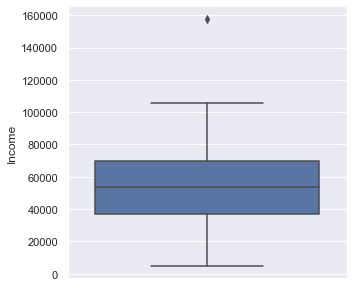

In [1422]:
sns.boxplot(y="Income", data=df)

In [1423]:
df[df['Income']>110000]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age
531,5336,1971.0,Master,Together,157733.0,1.0,0.0,04/06/2013,37,39.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,51.0


In [1424]:
# get out the rich man
df.at[531, 'Income'] = 110000
# df=df.drop(df.index[df['Income']>110000])


### 2. Filling missing values by exploring correlations. 

In [1425]:
# df['Education_cat'] = df['Education'].astype('category').cat.codes
# df['Status_cat'] = df['Status'].astype('category').cat.codes


In [1426]:
# df.groupby(['Status','Status_cat']).size()

In [1427]:
df.corr(method = 'pearson')

,ID,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age
ID,1.000000,0.008984,0.027705,-0.000057,-0.010270,-0.070458,0.015393,0.000431,0.019376,-0.035732,...,-0.034499,-0.013998,0.001529,0.067302,0.002253,0.017286,0.084894,NaN,NaN,-0.008984
Year_Birth,0.008984,1.000000,-0.211891,0.235520,-0.287778,-0.034974,-0.174203,-0.025725,-0.074050,-0.063724,...,0.097710,0.076700,-0.064213,0.072977,0.008662,-0.005874,-0.033317,NaN,NaN,-1.000000
Income,0.027705,-0.211891,1.000000,-0.560474,-0.024674,-0.014644,0.700111,0.546773,0.693561,0.566828,...,-0.640593,-0.028966,0.202691,0.417585,0.373402,0.114887,-0.099167,NaN,NaN,0.211891
Num_of_kids,-0.000057,0.235520,-0.560474,1.000000,-0.028687,-0.023579,-0.512032,-0.366884,-0.440222,-0.404689,...,0.477830,0.051770,-0.170411,-0.214342,-0.199530,-0.086919,0.114101,NaN,NaN,-0.235520
Num_of_Teen,-0.010270,-0.287778,-0.024674,-0.028687,1.000000,0.001960,-0.082926,-0.207564,-0.288492,-0.241260,...,0.159198,-0.079178,-0.022207,-0.241054,-0.220961,-0.078338,-0.067864,NaN,NaN,0.287778
Recency,-0.070458,-0.034974,-0.014644,-0.023579,0.001960,1.000000,-0.016983,-0.043638,-0.022080,0.009456,...,-0.012080,0.029111,0.006149,-0.016656,0.047469,0.021246,0.015479,NaN,NaN,0.034974
Mnt_Fruits,0.015393,-0.174203,0.700111,-0.512032,-0.082926,-0.016983,1.000000,0.421239,0.563435,0.432543,...,-0.314444,0.020466,0.338227,0.410958,0.303935,0.169448,-0.074028,NaN,NaN,0.174203
Mnt_Meat,0.000431,-0.025725,0.546773,-0.366884,-0.207564,-0.043638,0.421239,1.000000,0.509000,0.653118,...,-0.409602,0.031609,0.000510,0.245135,0.244636,0.003753,-0.021067,NaN,NaN,0.025725
Mnt_sweet,0.019376,-0.074050,0.693561,-0.440222,-0.288492,-0.022080,0.563435,0.509000,1.000000,0.588626,...,-0.510422,0.008936,0.173934,0.366040,0.347045,0.102524,-0.051959,NaN,NaN,0.074050
Mnt_Wines,-0.035732,-0.063724,0.566828,-0.404689,-0.241260,0.009456,0.432543,0.653118,0.588626,1.000000,...,-0.457041,0.002999,0.023510,0.193808,0.324544,0.014759,-0.034864,NaN,NaN,0.063724


<AxesSubplot:>

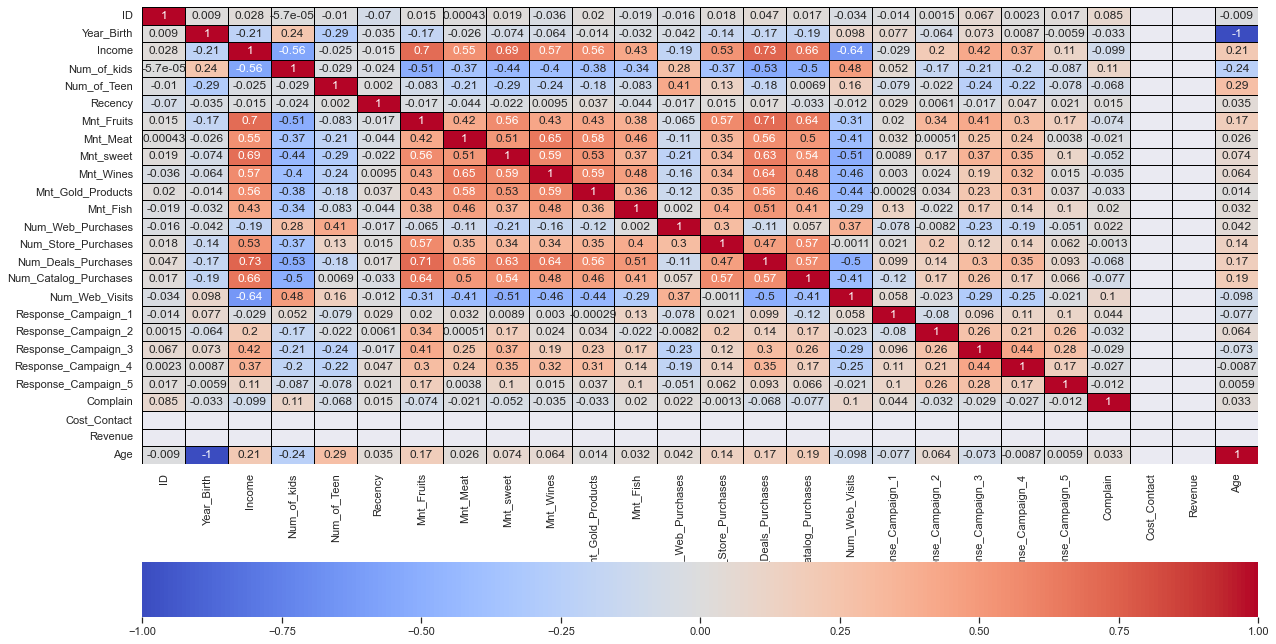

In [1428]:
# heat map
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.7, linecolor='black', cbar_kws= {'orientation': 'horizontal'})

In [1429]:
# df.info()
# # df[df.isnull().sum(axis=1)>5]

## search for coorrelation to fill the missing age

In [1430]:
# g = sns.FacetGrid(df, col='Num_of_Teen')
# g.map(plt.hist, 'Year_Birth', bins=20);

In [1431]:
for i in df['Num_of_Teen'].unique(): 
    df['Age'][df['Num_of_Teen']==i].median()
    print('For class ', i, ' the median is ', df.loc[df['Num_of_Teen']==i , 'Age'].median())
    print('and the number of missing values is ', df.loc[df['Num_of_Teen']==i , 'Age'].isnull().sum(), 
          'out of ',(df['Num_of_Teen']==i).sum(), 'rows')

For class  1.0  the median is  57.0
and the number of missing values is  3 out of  259 rows
For class  2.0  the median is  65.0
and the number of missing values is  0 out of  13 rows
For class  0.0  the median is  49.0
and the number of missing values is  2 out of  278 rows
For class  nan  the median is  nan
and the number of missing values is  0 out of  0 rows


In [1432]:
for i in [0.0,1.0]:
    df.loc[df['Num_of_Teen']==i , 'Age'] = df['Age'][df['Num_of_Teen']==i].fillna(value=df['Age'][df['Num_of_Teen']==i].median())
# df.info()

In [1433]:
df[df['Age'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age
42,10905,NaN,NaN,NaN,NaN,NaN,NaN,29/10/2012,7,194.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,NaN
194,3536,NaN,NaN,NaN,NaN,NaN,NaN,24/03/2013,65,7.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,NaN
355,10164,NaN,NaN,NaN,NaN,NaN,NaN,03/04/2014,75,1017.0,...,10.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,11.0,NaN
385,2326,NaN,NaN,NaN,NaN,NaN,NaN,16/02/2013,15,32.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,NaN


In [1434]:
# נשאר עוד כמה אנשים ללא גיל -נמלא אותם בשכיח\ או ממוצע
mean_age = df['Age'].mean()
mean_age
df['Age'] = df['Age'].fillna(mean_age)

In [1435]:
df['Age'] = df['Age'].fillna(mean_age)

In [1436]:
df[df['Education'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age
42,10905,NaN,NaN,NaN,NaN,NaN,NaN,29/10/2012,7,194.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,53.636691
194,3536,NaN,NaN,NaN,NaN,NaN,NaN,24/03/2013,65,7.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,53.636691
355,10164,NaN,NaN,NaN,NaN,NaN,NaN,03/04/2014,75,1017.0,...,10.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,11.0,53.636691
385,2326,NaN,NaN,NaN,NaN,NaN,NaN,16/02/2013,15,32.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,53.636691


In [1437]:
mode = df['Education'].mode()[0]
mode

'Graduation'

In [1438]:
df['Education'] = df['Education'].fillna(mode)

In [1439]:
df['Education_cat'] = df['Education'].astype('category').cat.codes

In [1440]:
df.groupby(['Education','Education_cat']).size()

Education   Education_cat
2n Cycle    0                 55
Basic       1                  7
Graduation  2                294
Master      3                 85
PhD         4                119
dtype: int64

In [1441]:
df[df['Status'].isnull()==True]
has_kids = df[df['Num_of_kids']>0]
fill = has_kids[has_kids['Status'].isnull()]
fill

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age,Education_cat
3,6566,1954.0,PhD,NaN,72550.0,1.0,1.0,08/11/2012,39,826.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,68.0,4
83,2404,1976.0,Graduation,NaN,53359.0,1.0,1.0,27/05/2013,4,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,46.0,2
235,503,1985.0,Master,NaN,20559.0,1.0,0.0,12/03/2013,88,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,37.0,3
262,11100,1972.0,Graduation,NaN,51813.0,1.0,1.0,11/04/2013,37,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,50.0,2
270,9422,1989.0,Graduation,NaN,38360.0,1.0,0.0,31/05/2013,26,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,33.0,2
316,7829,1900.0,2n Cycle,NaN,36640.0,1.0,0.0,26/09/2013,99,15.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0,122.0,0


In [1442]:
## ERROR איך למלא עמודות שבהם יש רק ילדים להפוך להיות נשואים בסטטוס
mode = df['Status'].mode()[0]
df['Status'] = df['Status'].fillna(mode)

In [1443]:

df['Status_cat'] = df['Status'].astype('category').cat.codes

In [1444]:
df.groupby(['Status','Status_cat']).size()
# df.head()--בעיה מוזרה שמייצר שלילי

Status    Status_cat
Alone     0               1
Divorced  1              57
Married   2             212
Single    3             121
Together  4             144
Widow     5              25
dtype: int64

## fix the missing Num_Web_Purchases

In [1445]:
df[df['Num_Web_Purchases'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age,Education_cat,Status_cat
545,6742,1979.0,Graduation,Married,17688.0,1.0,0.0,13/01/2013,82,2.0,...,0.0,0.0,0.0,0.0,1.0,3.0,11.0,43.0,2,2
546,2928,1975.0,PhD,Single,52614.0,0.0,1.0,01/12/2012,63,789.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,47.0,4,3
547,123,1951.0,Graduation,Widow,67046.0,0.0,1.0,06/01/2013,92,544.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,71.0,2,5
548,1509,1958.0,PhD,Together,84460.0,0.0,0.0,04/01/2013,80,152.0,...,1.0,1.0,1.0,1.0,0.0,3.0,11.0,64.0,4,4
549,6798,1966.0,Graduation,Single,37070.0,1.0,1.0,20/03/2013,30,231.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,56.0,2,3
550,945,1965.0,Graduation,Together,36317.0,0.0,1.0,22/05/2013,53,87.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,57.0,2,4
551,375,1954.0,Graduation,Divorced,76773.0,0.0,0.0,25/02/2013,79,516.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,68.0,2,1
552,7617,1974.0,Graduation,Single,42373.0,1.0,1.0,15/08/2013,83,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,2,3
553,7281,1959.0,PhD,Single,NaN,0.0,0.0,05/11/2013,80,81.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,63.0,4,3
554,1407,1986.0,Basic,Married,20425.0,1.0,0.0,29/10/2012,5,4.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,36.0,1,2


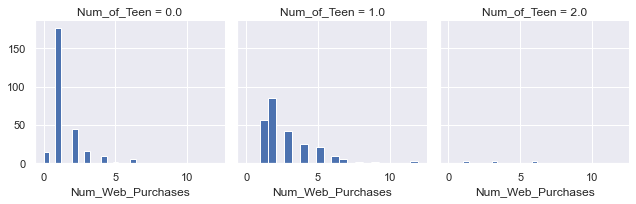

In [1446]:
g = sns.FacetGrid(df, col='Num_of_Teen')
g.map(plt.hist, 'Num_Web_Purchases', bins=20);

In [1447]:
for i in df['Num_of_Teen'].unique(): 
    df['Num_Web_Purchases'][df['Num_of_Teen']==i].median()
    print('For class ', i, ' the median is ', df.loc[df['Num_of_Teen']==i , 'Num_Web_Purchases'].median())
    print('and the number of missing values is ', df.loc[df['Num_of_Teen']==i , 'Num_Web_Purchases'].isnull().sum(), 
          'out of ',(df['Num_of_Teen']==i).sum(), 'rows')

For class  1.0  the median is  2.0
and the number of missing values is  7 out of  259 rows
For class  2.0  the median is  3.5
and the number of missing values is  1 out of  13 rows
For class  0.0  the median is  1.0
and the number of missing values is  7 out of  278 rows
For class  nan  the median is  nan
and the number of missing values is  0 out of  0 rows


In [1448]:
for i in [0.0,1.0,2.0]:
    df.loc[df['Num_of_Teen']==i , 'Num_Web_Purchases'] = df['Num_Web_Purchases'][df['Num_of_Teen']==i].fillna(value=df['Num_Web_Purchases'][df['Num_of_Teen']==i].median())
df[df['Num_Web_Purchases'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age,Education_cat,Status_cat


In [1449]:
# df.info()

# ילדים ומתגברים לא חסר הרבה נשלים לפי הרוב 


In [1450]:
mode = df['Num_of_kids'].mode()[0]
mode
df['Num_of_kids'] = df['Num_of_kids'].fillna(mode)

In [1451]:
# ילדים ומתגברים לא חסר הרבה נשלים לפי הרוב 
mode = df['Num_of_Teen'].mode()[0]
mode
df['Num_of_Teen'] = df['Num_of_Teen'].fillna(mode)

## Now checek IncomeNow checek Income
For Income we will generate random values from a similar distribution. (there are some connection but to do somthing else)

In [1452]:
df[df['Income'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age,Education_cat,Status_cat
1,8996,1957.0,PhD,Married,NaN,2.0,1.0,19/11/2012,4,230.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,65.000000,4,2
2,8432,1956.0,Graduation,Together,NaN,1.0,1.0,14/09/2012,0,454.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,66.000000,2,4
11,7187,1969.0,Master,Together,NaN,1.0,1.0,18/05/2013,52,375.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,53.000000,3,4
42,10905,NaN,Graduation,Married,NaN,0.0,0.0,29/10/2012,7,194.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,53.636691,2,2
75,8858,1972.0,PhD,Married,NaN,0.0,1.0,07/03/2013,69,516.0,...,1.0,0.0,0.0,0.0,0.0,3.0,11.0,50.000000,4,2
188,1612,1981.0,PhD,Single,NaN,1.0,0.0,31/05/2013,82,23.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,41.000000,4,3
194,3536,NaN,Graduation,Married,NaN,0.0,0.0,24/03/2013,65,7.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,53.636691,2,2
210,9197,1953.0,Graduation,Married,NaN,0.0,1.0,24/02/2014,92,32.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,69.000000,2,2
332,4345,1964.0,2n Cycle,Single,NaN,1.0,1.0,12/01/2014,49,5.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,58.000000,0,3
355,10164,NaN,Graduation,Married,NaN,0.0,0.0,03/04/2014,75,1017.0,...,1.0,1.0,0.0,0.0,0.0,3.0,11.0,53.636691,2,2


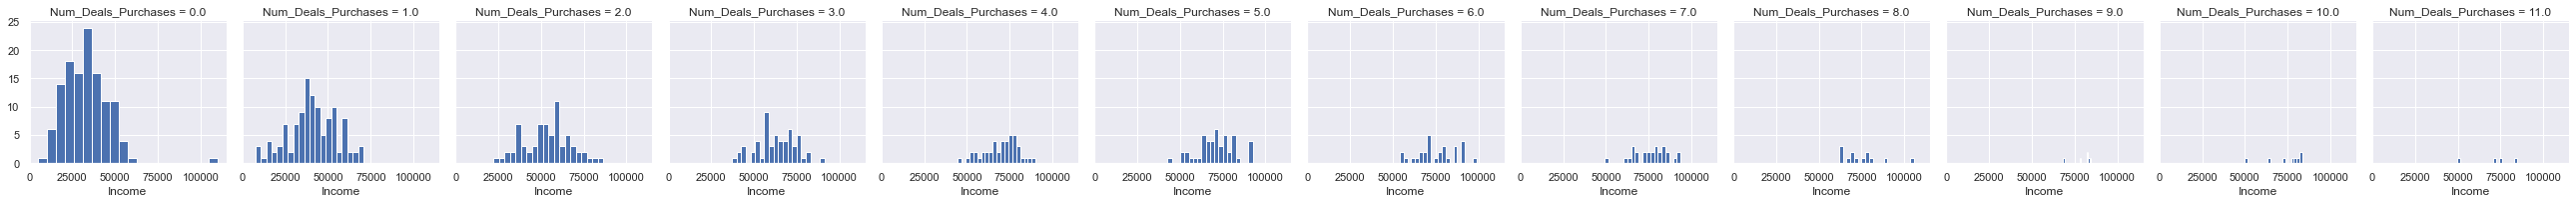

In [1453]:
g = sns.FacetGrid(df, col='Num_Deals_Purchases')
g.map(plt.hist, 'Income', bins=20);

In [1454]:
for i in df['Num_Deals_Purchases'].unique(): 
    df['Income'][df['Num_Deals_Purchases']==i].median()
    print('For class ', i, ' the median is ', df.loc[df['Num_Deals_Purchases']==i , 'Income'].median())
    print('and the number of missing values is ', df.loc[df['Num_Deals_Purchases']==i , 'Income'].isnull().sum(), 
          'out of ',(df['Num_Deals_Purchases']==i).sum(), 'rows')

For class  2.0  the median is  53790.0
and the number of missing values is  4 out of  73 rows
For class  3.0  the median is  62738.5
and the number of missing values is  1 out of  57 rows
For class  1.0  the median is  39747.0
and the number of missing values is  3 out of  118 rows
For class  10.0  the median is  78295.5
and the number of missing values is  1 out of  9 rows
For class  11.0  the median is  72610.5
and the number of missing values is  0 out of  4 rows
For class  4.0  the median is  71187.0
and the number of missing values is  0 out of  44 rows
For class  5.0  the median is  70638.0
and the number of missing values is  1 out of  48 rows
For class  6.0  the median is  75777.0
and the number of missing values is  0 out of  29 rows
For class  7.0  the median is  77520.0
and the number of missing values is  0 out of  27 rows
For class  0.0  the median is  33235.0
and the number of missing values is  7 out of  130 rows
For class  8.0  the median is  70643.0
and the number of m

In [1455]:
for i in [2,3,1,10,11,5,0]:
    df.loc[df['Num_Deals_Purchases']==i , 'Income'] = df['Income'][df['Num_Deals_Purchases']==i].fillna(value=df['Income'][df['Num_Deals_Purchases']==i].median())
df[df['Income'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age,Education_cat,Status_cat


## fix missinig on swets and cmapign 1

In [1456]:
mean_sweet = df['Mnt_sweet'].mean()
mean_sweet
df['Mnt_sweet'] = df['Mnt_sweet'].fillna(mean_sweet)

In [1457]:
mode = df['Response_Campaign_1'].mode()[0]
df['Response_Campaign_1'] = df['Response_Campaign_1'].fillna(mode)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     560 non-null    int64  
 1   Year_Birth             551 non-null    float64
 2   Education              560 non-null    object 
 3   Status                 560 non-null    object 
 4   Income                 560 non-null    float64
 5   Num_of_kids            560 non-null    float64
 6   Num_of_Teen            560 non-null    float64
 7   Registration_date      560 non-null    object 
 8   Recency                560 non-null    int64  
 9   Mnt_Fruits             558 non-null    float64
 10  Mnt_Meat               558 non-null    float64
 11  Mnt_sweet              560 non-null    float64
 12  Mnt_Wines              558 non-null    float64
 13  Mnt_Gold_Products      558 non-null    float64
 14  Mnt_Fish               558 non-null    float64
 15  Num_We

## Now clean the colomus still not number
### than, Normalized

In [1458]:

# df.info()
# df = df.drop(['Education'], axis = 1)

In [1459]:
# take care of the Registeration date
df[['Registration_date_day', 'Registration_date_month', 'Registration_date_year']] = df['Registration_date'].str.split('/', expand=True)
df['Registration_date_day'] = df['Registration_date_day'].astype(float)
df['Registration_date_month'] = df['Registration_date_month'].astype(float)
df['Registration_date_year'] = df['Registration_date_year'].astype(float)
df= df.drop(['Registration_date'], axis=1)
df.head()

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age,Education_cat,Status_cat,Registration_date_day,Registration_date_month,Registration_date_year
0,5430,1956.0,Graduation,Together,54450.0,1.0,1.0,0,454.0,0.0,...,0.0,0.0,3.0,11.0,66.0,2,4,14.0,9.0,2012.0
1,8996,1957.0,PhD,Married,53790.0,2.0,1.0,4,230.0,42.0,...,0.0,0.0,3.0,11.0,65.0,4,2,19.0,11.0,2012.0
2,8432,1956.0,Graduation,Together,53790.0,1.0,1.0,0,454.0,0.0,...,0.0,0.0,3.0,11.0,66.0,2,4,14.0,9.0,2012.0
3,6566,1954.0,PhD,Married,72550.0,1.0,1.0,39,826.0,50.0,...,0.0,0.0,3.0,11.0,68.0,4,2,8.0,11.0,2012.0
4,2552,1955.0,PhD,Single,55521.0,1.0,2.0,11,416.0,0.0,...,0.0,0.0,3.0,11.0,67.0,4,3,22.0,10.0,2013.0


In [1460]:

## הסבר: בתחילה חשבנו שניתן למחוק רשומות שהפריעו לנו ולכן ביצענו את כל הניקוי כך,
## לאחר מכן הבנו שזה בעייתי 
## לכן חזרנו על כל הפעולות מחדש ללא מחיקת רשומות, זה עבד מאוד טוב וכרגע נשאר רק פערים קטנים
## וכעת נשלים אותם עם השכיח או הממוצע שלהם ציק צק
# לפי שכיח

# Mnt_Fruits
mode = df['Mnt_Fruits'].mode()[0]
df['Mnt_Fruits'] = df['Mnt_Fruits'].fillna(mode)

# Mnt_Meat
mode = df['Mnt_Meat'].mode()[0]
df['Mnt_Meat'] = df['Mnt_Meat'].fillna(mode)

# Mnt_Fish
mode = df['Mnt_Fish'].mode()[0]
df['Mnt_Fish'] = df['Mnt_Fish'].fillna(mode)

# Mnt_Gold_Products
mode = df['Mnt_Gold_Products'].mode()[0]
df['Mnt_Gold_Products'] = df['Mnt_Gold_Products'].fillna(mode)

# Mnt_Wines
mode = df['Mnt_Wines'].mode()[0]
df['Mnt_Wines'] = df['Mnt_Wines'].fillna(mode)

# Num_Web_Visits
mode = df['Num_Web_Visits'].mode()[0]
df['Num_Web_Visits'] = df['Num_Web_Visits'].fillna(mode)

# Num_Store_Purchases
mode = df['Num_Store_Purchases'].mode()[0]
df['Num_Store_Purchases'] = df['Num_Store_Purchases'].fillna(mode)

# Num_Web_Visits
mode = df['Num_Web_Visits'].mode()[0]
df['Num_Web_Visits'] = df['Num_Web_Visits'].fillna(mode)

# Num_Deals_Purchases
mode = df['Num_Deals_Purchases'].mode()[0]
df['Num_Deals_Purchases'] = df['Num_Deals_Purchases'].fillna(mode)

# Num_Catalog_Purchases
mode = df['Num_Catalog_Purchases'].mode()[0]
df['Num_Catalog_Purchases'] = df['Num_Catalog_Purchases'].fillna(mode)

# Response_Campaign_(2-5)
mode = df['Response_Campaign_2'].mode()[0]
df['Response_Campaign_2'] = df['Response_Campaign_2'].fillna(mode)

mode = df['Response_Campaign_3'].mode()[0]
df['Response_Campaign_3'] = df['Response_Campaign_3'].fillna(mode)

mode = df['Response_Campaign_4'].mode()[0]
df['Response_Campaign_4'] = df['Response_Campaign_4'].fillna(mode)

# Response_Campaign_5
mode = df['Response_Campaign_5'].mode()[0]
df['Response_Campaign_5'] = df['Response_Campaign_5'].fillna(mode)

# Revenue
mode = df['Revenue'].mode()[0]
df['Revenue'] = df['Revenue'].fillna(mode)

# Cost_Contact
mode = df['Cost_Contact'].mode()[0]
df['Cost_Contact'] = df['Cost_Contact'].fillna(mode)

# Complain
mode = df['Complain'].mode()[0]
df['Complain'] = df['Complain'].fillna(mode)
                 


In [1461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       560 non-null    int64  
 1   Year_Birth               551 non-null    float64
 2   Education                560 non-null    object 
 3   Status                   560 non-null    object 
 4   Income                   560 non-null    float64
 5   Num_of_kids              560 non-null    float64
 6   Num_of_Teen              560 non-null    float64
 7   Recency                  560 non-null    int64  
 8   Mnt_Fruits               560 non-null    float64
 9   Mnt_Meat                 560 non-null    float64
 10  Mnt_sweet                560 non-null    float64
 11  Mnt_Wines                560 non-null    float64
 12  Mnt_Gold_Products        560 non-null    float64
 13  Mnt_Fish                 560 non-null    float64
 14  Num_Web_Purchases        5

### Normalization
- Min-max 


It is important to notice that new data (e.g. test data) is normalized by the same scale.

In [1462]:
df_out=df
for col in df_out:
    print(col, len(df_out[col].unique()))

ID 560
Year_Birth 56
Education 5
Status 6
Income 526
Num_of_kids 3
Num_of_Teen 3
Recency 100
Mnt_Fruits 340
Mnt_Meat 118
Mnt_sweet 262
Mnt_Wines 128
Mnt_Gold_Products 117
Mnt_Fish 138
Num_Web_Purchases 12
Num_Store_Purchases 12
Num_Deals_Purchases 12
Num_Catalog_Purchases 14
Num_Web_Visits 13
Response_Campaign_1 2
Response_Campaign_2 2
Response_Campaign_3 2
Response_Campaign_4 2
Response_Campaign_5 2
Complain 2
Cost_Contact 1
Revenue 1
Age 56
Education_cat 5
Status_cat 6
Registration_date_day 31
Registration_date_month 12
Registration_date_year 3


In [1463]:
# scaler = MinMaxScaler()
# for i in ['Recency','Num_Web_Purchases','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits','Age','Income','Mnt_Fruits','Mnt_Meat','Mnt_sweet','Mnt_Fish','Mnt_Gold_Products','Mnt_Wines']:
#     i2 = str(i) + "_norm"
#     scaler.fit(pd.DataFrame(df[i]))
#     df[i2] = scaler.transform(pd.DataFrame(df[i])).astype(np.float64)
#     print(str(scaler.data_min_) + "-->" + str(scaler.data_max_))
#     df[[i,i2]].head()

# df.head()

In [1464]:
# df[['Age','Age_norm']].head()

In [1465]:
df.groupby(['Status','Status_cat']).size()

Status    Status_cat
Alone     0               1
Divorced  1              57
Married   2             212
Single    3             121
Together  4             144
Widow     5              25
dtype: int64

In [1466]:
# sns.displot(df['Age_norm'], bins=20, kde=True, color='skyblue')
# sns.displot(df['Age'], bins=20, kde=True, color='skyblue')

In [1467]:
# df.info()

In [1468]:
# after norm just like some of them
# df.to_csv('test_after_norm_some.csv', index = False, encoding='utf-8') # False: not include index
df.head()


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age,Education_cat,Status_cat,Registration_date_day,Registration_date_month,Registration_date_year
0,5430,1956.0,Graduation,Together,54450.0,1.0,1.0,0,454.0,0.0,...,0.0,0.0,3.0,11.0,66.0,2,4,14.0,9.0,2012.0
1,8996,1957.0,PhD,Married,53790.0,2.0,1.0,4,230.0,42.0,...,0.0,0.0,3.0,11.0,65.0,4,2,19.0,11.0,2012.0
2,8432,1956.0,Graduation,Together,53790.0,1.0,1.0,0,454.0,0.0,...,0.0,0.0,3.0,11.0,66.0,2,4,14.0,9.0,2012.0
3,6566,1954.0,PhD,Married,72550.0,1.0,1.0,39,826.0,50.0,...,0.0,0.0,3.0,11.0,68.0,4,2,8.0,11.0,2012.0
4,2552,1955.0,PhD,Single,55521.0,1.0,2.0,11,416.0,0.0,...,0.0,0.0,3.0,11.0,67.0,4,3,22.0,10.0,2013.0


In [1469]:
#df_out' to clean all not norm
# df_out = df.drop(['Recency','Age','Income','Mnt_Fruits','Mnt_Meat','Mnt_sweet','Mnt_Fish','Mnt_Gold_Products','Mnt_Wines','Num_Web_Purchases','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits'], axis = 1)
# df_out = df.drop(['Num_Web_Purchases','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits'], axis = 1)

df_out.head()

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age,Education_cat,Status_cat,Registration_date_day,Registration_date_month,Registration_date_year
0,5430,1956.0,Graduation,Together,54450.0,1.0,1.0,0,454.0,0.0,...,0.0,0.0,3.0,11.0,66.0,2,4,14.0,9.0,2012.0
1,8996,1957.0,PhD,Married,53790.0,2.0,1.0,4,230.0,42.0,...,0.0,0.0,3.0,11.0,65.0,4,2,19.0,11.0,2012.0
2,8432,1956.0,Graduation,Together,53790.0,1.0,1.0,0,454.0,0.0,...,0.0,0.0,3.0,11.0,66.0,2,4,14.0,9.0,2012.0
3,6566,1954.0,PhD,Married,72550.0,1.0,1.0,39,826.0,50.0,...,0.0,0.0,3.0,11.0,68.0,4,2,8.0,11.0,2012.0
4,2552,1955.0,PhD,Single,55521.0,1.0,2.0,11,416.0,0.0,...,0.0,0.0,3.0,11.0,67.0,4,3,22.0,10.0,2013.0


In [1470]:
# df_out = df_out.drop(['Status','Education', 'Year_Birth','ID','Registration_date_day'], axis = 1)

In [1471]:
for col in df_out:
    print(col, len(df_out[col].unique()))

ID 560
Year_Birth 56
Education 5
Status 6
Income 526
Num_of_kids 3
Num_of_Teen 3
Recency 100
Mnt_Fruits 340
Mnt_Meat 118
Mnt_sweet 262
Mnt_Wines 128
Mnt_Gold_Products 117
Mnt_Fish 138
Num_Web_Purchases 12
Num_Store_Purchases 12
Num_Deals_Purchases 12
Num_Catalog_Purchases 14
Num_Web_Visits 13
Response_Campaign_1 2
Response_Campaign_2 2
Response_Campaign_3 2
Response_Campaign_4 2
Response_Campaign_5 2
Complain 2
Cost_Contact 1
Revenue 1
Age 56
Education_cat 5
Status_cat 6
Registration_date_day 31
Registration_date_month 12
Registration_date_year 3


In [1472]:
df_out.head()

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,...,Response_Campaign_5,Complain,Cost_Contact,Revenue,Age,Education_cat,Status_cat,Registration_date_day,Registration_date_month,Registration_date_year
0,5430,1956.0,Graduation,Together,54450.0,1.0,1.0,0,454.0,0.0,...,0.0,0.0,3.0,11.0,66.0,2,4,14.0,9.0,2012.0
1,8996,1957.0,PhD,Married,53790.0,2.0,1.0,4,230.0,42.0,...,0.0,0.0,3.0,11.0,65.0,4,2,19.0,11.0,2012.0
2,8432,1956.0,Graduation,Together,53790.0,1.0,1.0,0,454.0,0.0,...,0.0,0.0,3.0,11.0,66.0,2,4,14.0,9.0,2012.0
3,6566,1954.0,PhD,Married,72550.0,1.0,1.0,39,826.0,50.0,...,0.0,0.0,3.0,11.0,68.0,4,2,8.0,11.0,2012.0
4,2552,1955.0,PhD,Single,55521.0,1.0,2.0,11,416.0,0.0,...,0.0,0.0,3.0,11.0,67.0,4,3,22.0,10.0,2013.0


In [1473]:
dummies_col = [col for col in df if len(df[col].unique()) > 2 and len(df[col].unique()) < 15]
dummies_col

['Education',
 'Status',
 'Num_of_kids',
 'Num_of_Teen',
 'Num_Web_Purchases',
 'Num_Store_Purchases',
 'Num_Deals_Purchases',
 'Num_Catalog_Purchases',
 'Num_Web_Visits',
 'Education_cat',
 'Status_cat',
 'Registration_date_month',
 'Registration_date_year']

In [1474]:
dummies_col = [col for col in df if len(df[col].unique()) > 2 and len(df[col].unique()) < 15]
dummies_col.remove('Num_Web_Purchases')
dummies_col.remove('Num_Store_Purchases')
dummies_col.remove('Num_Deals_Purchases')
dummies_col.remove('Num_Catalog_Purchases')
dummies_col.remove('Num_Web_Visits')

dummies_col
# = pd.get_dummies(data = X, columns = dummies_col )
# X_dummies.head()

['Education',
 'Status',
 'Num_of_kids',
 'Num_of_Teen',
 'Education_cat',
 'Status_cat',
 'Registration_date_month',
 'Registration_date_year']

In [1475]:
X_dummies = pd.get_dummies(data = df, columns = dummies_col )
X_dummies.head()

,ID,Year_Birth,Income,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,...,Registration_date_month_6.0,Registration_date_month_7.0,Registration_date_month_8.0,Registration_date_month_9.0,Registration_date_month_10.0,Registration_date_month_11.0,Registration_date_month_12.0,Registration_date_year_2012.0,Registration_date_year_2013.0,Registration_date_year_2014.0
0,5430,1956.0,54450.0,0,454.0,0.0,171.0,8.0,19.0,32.0,...,0,0,0,1,0,0,0,1,0,0
1,8996,1957.0,53790.0,4,230.0,42.0,192.0,49.0,37.0,53.0,...,0,0,0,0,0,1,0,1,0,0
2,8432,1956.0,53790.0,0,454.0,0.0,171.0,8.0,19.0,32.0,...,0,0,0,1,0,0,0,1,0,0
3,6566,1954.0,72550.0,39,826.0,50.0,317.0,50.0,38.0,38.0,...,0,0,0,0,0,1,0,1,0,0
4,2552,1955.0,55521.0,11,416.0,0.0,26.0,0.0,0.0,4.0,...,0,0,0,0,1,0,0,0,1,0


# NOW NORMLIZE

In [1476]:
scaler = MinMaxScaler()
for i in ['Recency','Num_Web_Purchases','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits','Age','Income','Mnt_Fruits','Mnt_Meat','Mnt_sweet','Mnt_Fish','Mnt_Gold_Products','Mnt_Wines']:
    i2 = str(i) + "_norm"
    scaler.fit(pd.DataFrame(df[i]))
    df[i2] = scaler.transform(pd.DataFrame(df[i])).astype(np.float64)
    print(str(scaler.data_min_) + "-->" + str(scaler.data_max_))
    df[[i,i2]].head()

df.info()

[0.]-->[99.]
[0.]-->[12.]
[0.]-->[11.]
[0.]-->[11.]
[0.]-->[13.]
[0.]-->[28.]
[26.]-->[122.]
[4861.]-->[110000.]
[0.]-->[1462.]
[0.]-->[199.]
[0.]-->[1607.]
[0.]-->[247.]
[0.]-->[194.]
[0.]-->[250.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          560 non-null    int64  
 1   Year_Birth                  551 non-null    float64
 2   Education                   560 non-null    object 
 3   Status                      560 non-null    object 
 4   Income                      560 non-null    float64
 5   Num_of_kids                 560 non-null    float64
 6   Num_of_Teen                 560 non-null    float64
 7   Recency                     560 non-null    int64  
 8   Mnt_Fruits                  560 non-null    float64
 9   Mnt_Meat                    560 non-null    float64
 10  Mnt_swe

In [1477]:
df_out = df.drop(['Status','Education', 'Year_Birth','ID','Registration_date_day'], axis = 1)
df_out = df.drop(['Recency','Age','Income','Mnt_Fruits','Mnt_Meat','Mnt_sweet','Mnt_Fish','Mnt_Gold_Products','Mnt_Wines','Num_Web_Purchases','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits'], axis = 1)
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          560 non-null    int64  
 1   Year_Birth                  551 non-null    float64
 2   Education                   560 non-null    object 
 3   Status                      560 non-null    object 
 4   Num_of_kids                 560 non-null    float64
 5   Num_of_Teen                 560 non-null    float64
 6   Response_Campaign_1         560 non-null    float64
 7   Response_Campaign_2         560 non-null    float64
 8   Response_Campaign_3         560 non-null    float64
 9   Response_Campaign_4         560 non-null    float64
 10  Response_Campaign_5         560 non-null    float64
 11  Complain                    560 non-null    float64
 12  Cost_Contact                560 non-null    float64
 13  Revenue                     560 non

In [1478]:
df_out = df_out.drop(['Status','Education', 'Year_Birth','ID','Registration_date_day'], axis = 1)

In [1479]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Num_of_kids                 560 non-null    float64
 1   Num_of_Teen                 560 non-null    float64
 2   Response_Campaign_1         560 non-null    float64
 3   Response_Campaign_2         560 non-null    float64
 4   Response_Campaign_3         560 non-null    float64
 5   Response_Campaign_4         560 non-null    float64
 6   Response_Campaign_5         560 non-null    float64
 7   Complain                    560 non-null    float64
 8   Cost_Contact                560 non-null    float64
 9   Revenue                     560 non-null    float64
 10  Education_cat               560 non-null    int8   
 11  Status_cat                  560 non-null    int8   
 12  Registration_date_month     560 non-null    float64
 13  Registration_date_year      560 non

In [1482]:
df_out.head()

,Num_of_kids,Num_of_Teen,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,...,Num_Catalog_Purchases_norm,Num_Web_Visits_norm,Age_norm,Income_norm,Mnt_Fruits_norm,Mnt_Meat_norm,Mnt_sweet_norm,Mnt_Fish_norm,Mnt_Gold_Products_norm,Mnt_Wines_norm
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,...,0.615385,0.571429,0.416667,0.471652,0.310534,0.000000,0.106409,0.129555,0.097938,0.032
1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,...,0.615385,0.642857,0.406250,0.465374,0.157319,0.211055,0.119477,0.214575,0.190722,0.196
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,...,0.615385,0.571429,0.416667,0.465374,0.310534,0.000000,0.106409,0.129555,0.097938,0.032
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,...,0.923077,0.571429,0.437500,0.643805,0.564979,0.251256,0.197262,0.153846,0.195876,0.200
4,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,...,0.461538,0.500000,0.427083,0.481838,0.284542,0.000000,0.016179,0.016194,0.000000,0.000


In [1481]:
df_out.to_csv('test_ready.csv', index = False, encoding='utf-8') # False: not include index

# PART 2 'Work on the test!''